In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [3]:
dataFile=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\sel_cells_percentile_RTC_radial.csv'

In [4]:
myData=pd.read_csv(dataFile)

In [5]:
# add physical time based on DHB length
myData['age_track'] = (myData.DHB_len - 1) *10 / 60

In [6]:
# add day of experiments (with 'd' because otherwise seaborn fails to recognize it as a category)
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [7]:
myData.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,file,original cell name,Amy_mod,movie,x,...,hetChrom_sphere_inner_20_volume,hetChrom_sphere_outer_20_volume,hetChrom_sphere_inner_20_ch1,hetChrom_sphere_outer_20_ch1,hetChrom_sphere_inner_20_ch2,hetChrom_sphere_outer_20_ch2,hetChrom_sphere_inner_20_ch3,hetChrom_sphere_outer_20_ch3,age_track,day
0,0,0,0,0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172,...,21399.0,70560.0,7.112529e+09,6.553297e+09,4.405562e+09,4.221775e+09,1.460296e+10,1.326325e+10,0.666667,d20190625
1,1,1,1,1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,...,23828.0,63453.0,6.634768e+09,6.188365e+09,4.255313e+09,4.117379e+09,1.426994e+10,1.314886e+10,0.666667,d20190625
2,2,2,2,2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,...,22271.0,57127.0,7.964638e+09,7.454485e+09,5.043359e+09,4.892022e+09,1.539565e+10,1.420747e+10,2.000000,d20190625
3,3,3,3,3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,...,27542.0,56769.0,6.614417e+09,6.273464e+09,4.344614e+09,4.229036e+09,1.391964e+10,1.307010e+10,2.000000,d20190625
4,4,4,4,4,4,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,...,45981.0,116832.0,1.106705e+10,9.969171e+09,4.900325e+09,4.701054e+09,2.706677e+10,2.480375e+10,19.500000,d20190625


In [8]:
indexNames = myData[ myData['hetChrom_newctl_volume'] == 0 ].index

In [9]:
myData=myData.drop(indexNames)

In [10]:
myTrendData=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [75]:
myTrendDatand=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [12]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [13]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

# plot to compare inner and outer

<IPython.core.display.Javascript object>


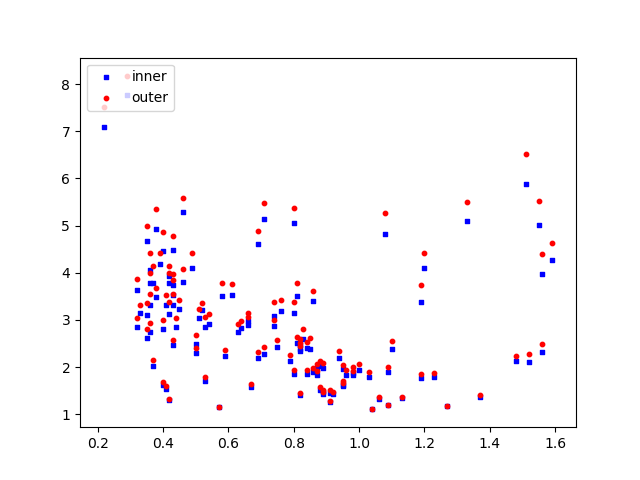

In [14]:
%matplotlib notebook
x = myDataSel.molecularAge_ratio
y1 = (myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
y2=myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y1, s=10, c='b', marker="s", label='inner')
ax1.scatter(x,y2, s=10, c='r', marker="o", label='outer')
plt.legend(loc='upper left');
plt.show()

# plots for deconvolved

## original

<IPython.core.display.Javascript object>


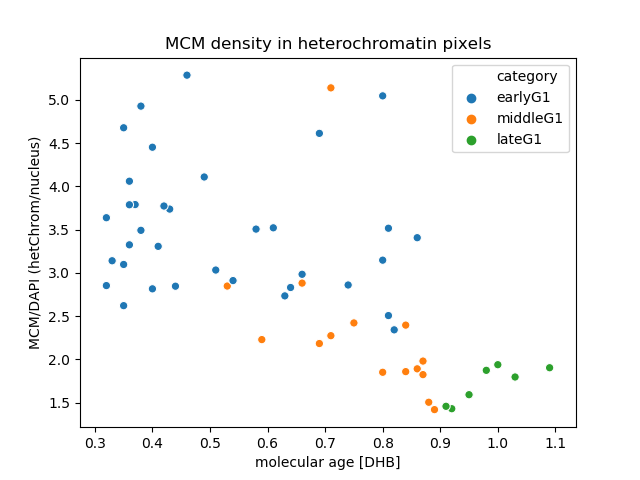

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [15]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


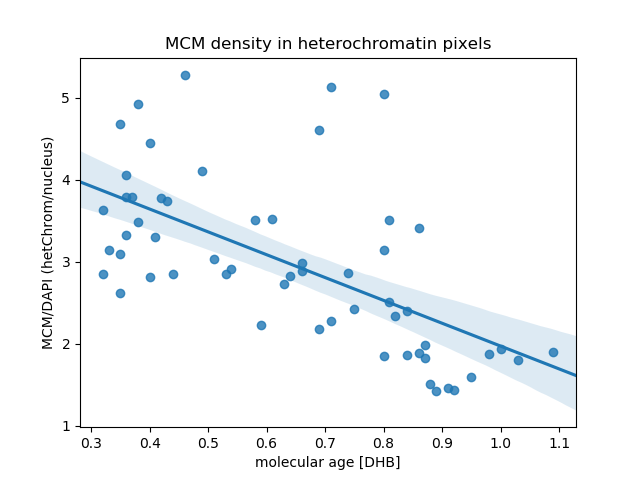

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [16]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [17]:
x = np.array(myDataSel.molecularAge_ratio)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [18]:
myTrendData=myTrendData.append(pd.Series(['original_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### outer

<IPython.core.display.Javascript object>


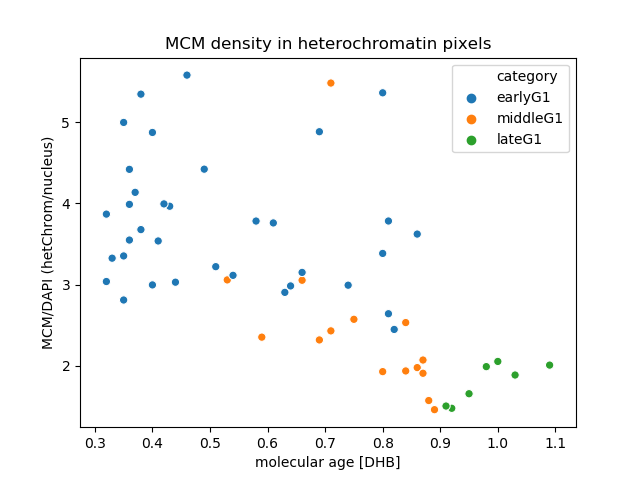

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [19]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


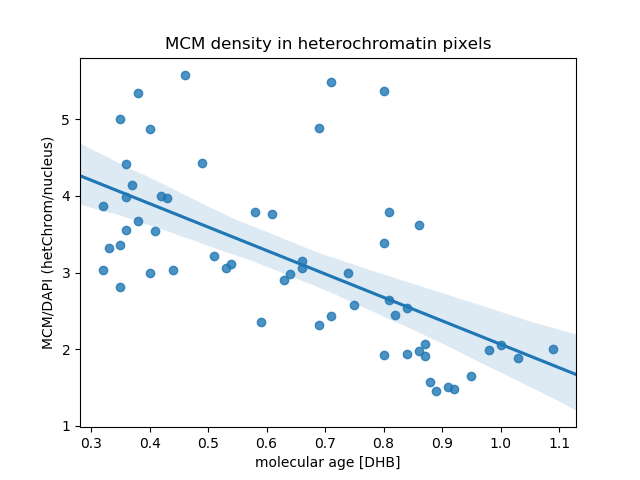

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [20]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [21]:
x = np.array(myDataSel.molecularAge_ratio)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [22]:
myTrendData=myTrendData.append(pd.Series(['original_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## Modification

### modification = 0.3, inner

In [23]:
mod=0.3

In [24]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


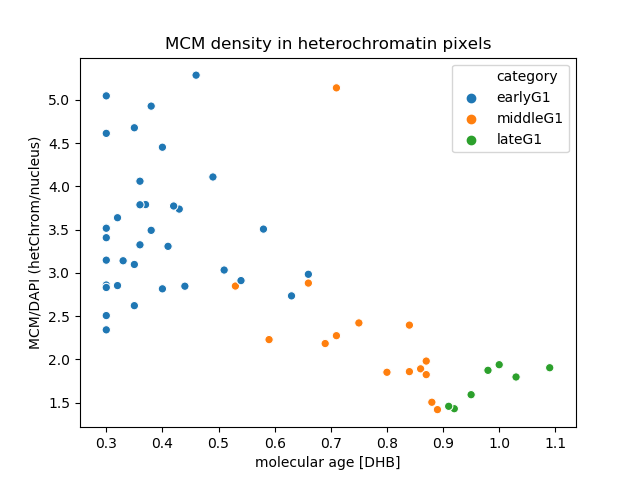

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [25]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


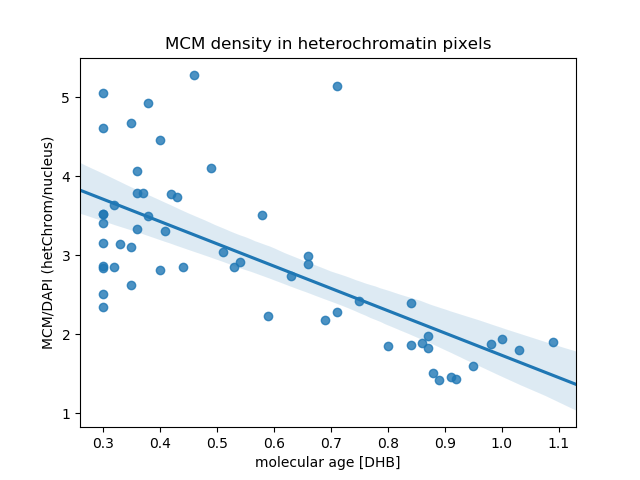

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [26]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [27]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [28]:
myTrendData=myTrendData.append(pd.Series(['0.3_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### mod=0.3, outer

<IPython.core.display.Javascript object>


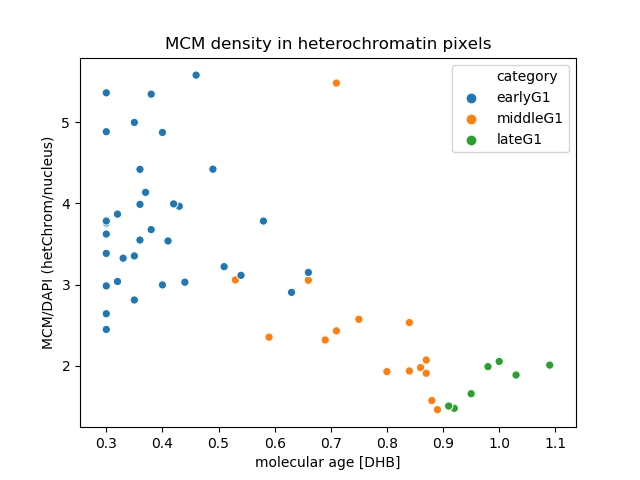

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [29]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


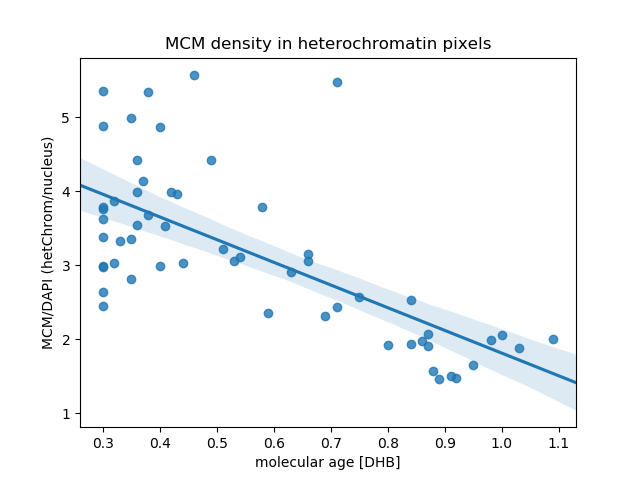

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [30]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [31]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [32]:
myTrendData=myTrendData.append(pd.Series(['0.3_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0, inner

In [33]:
mod=0

In [34]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


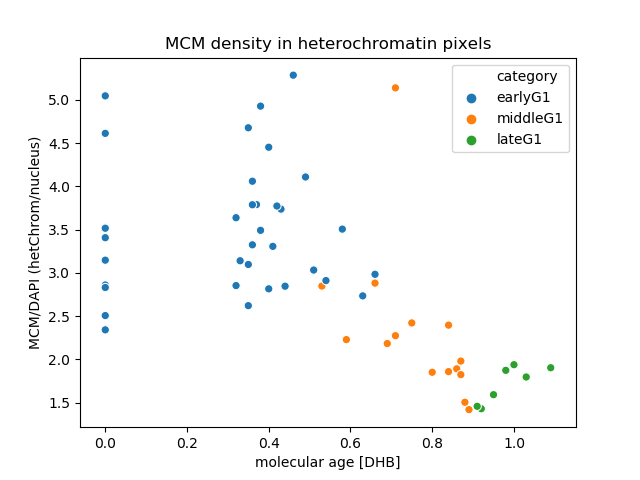

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [35]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


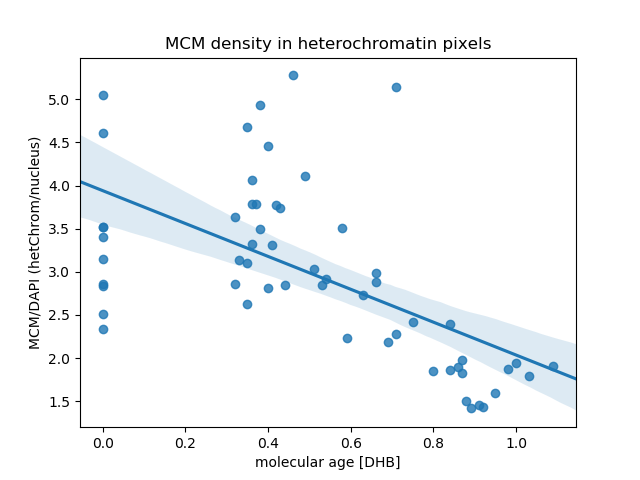

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [36]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [37]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [38]:
myTrendData=myTrendData.append(pd.Series(['0_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### mod=0, outer

<IPython.core.display.Javascript object>


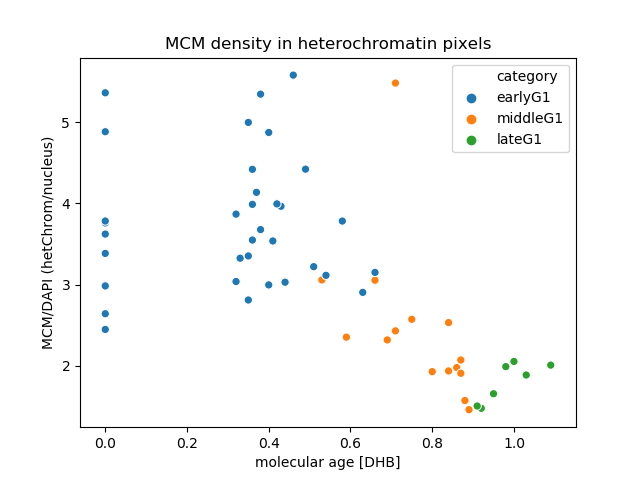

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [39]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


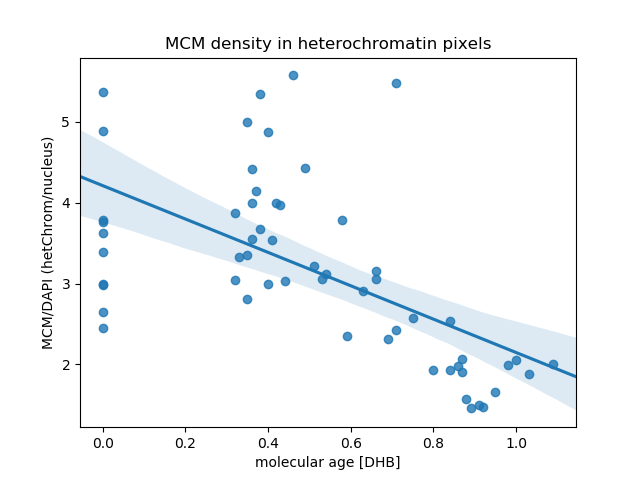

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [40]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [41]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [42]:
myTrendData=myTrendData.append(pd.Series(['0_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5, inner

In [43]:
mod=0.5

In [44]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


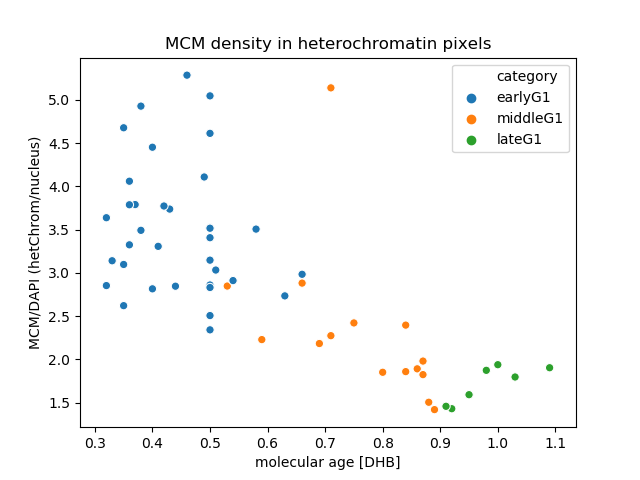

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [45]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


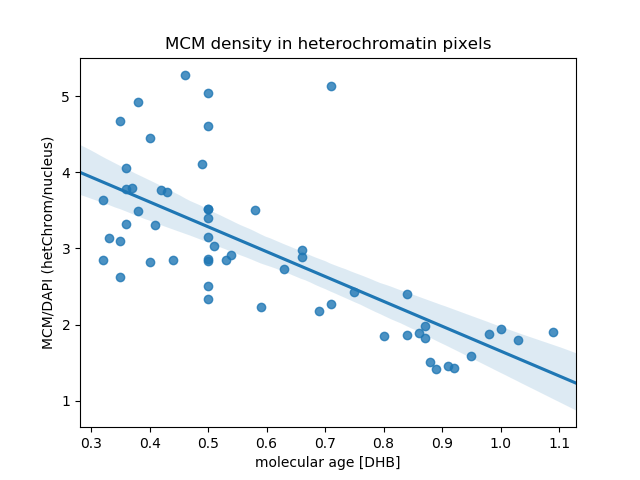

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [46]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [47]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [48]:
myTrendData=myTrendData.append(pd.Series(['0.5_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5, outer

<IPython.core.display.Javascript object>


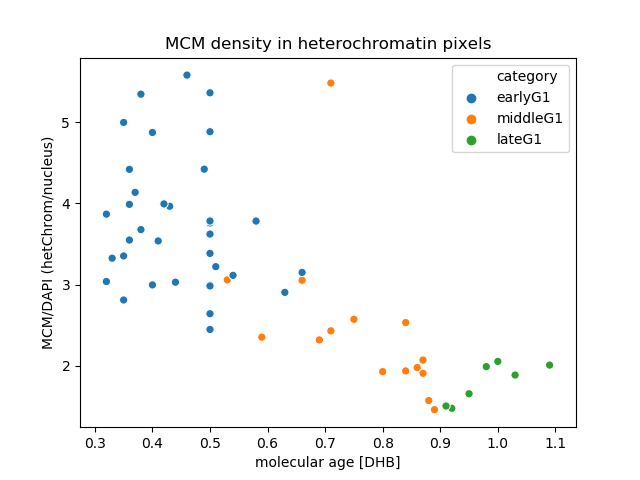

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [49]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


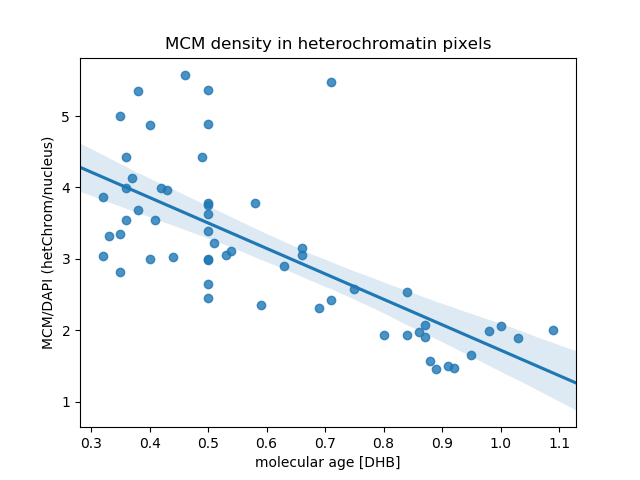

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [50]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [51]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [52]:
myTrendData=myTrendData.append(pd.Series(['0.5_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy modification, inner

In [53]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel_mol_age_change=myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']

In [54]:
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=-1*myDataSel['mol_age_mod']+np.max(myDataSel_mol_age_change)

<IPython.core.display.Javascript object>


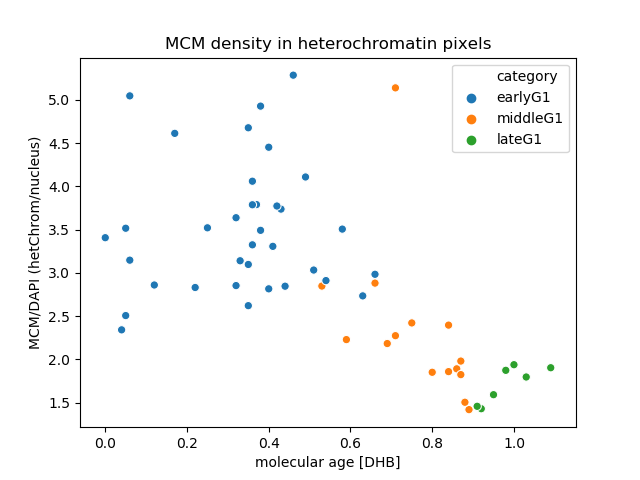

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [55]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


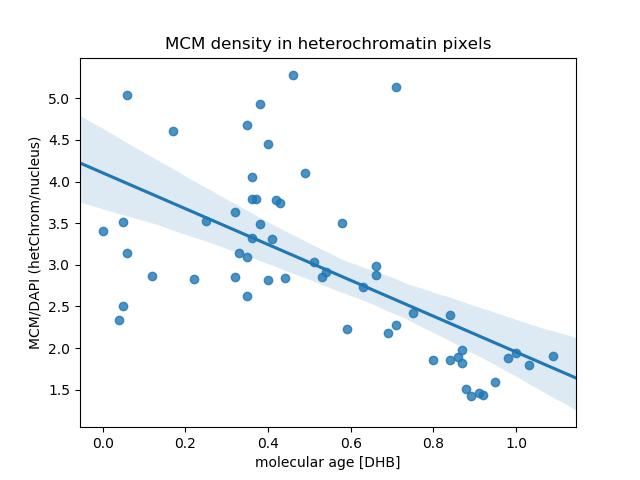

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [56]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [57]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [58]:
myTrendData=myTrendData.append(pd.Series(['amy_mod_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy mod, outer

<IPython.core.display.Javascript object>


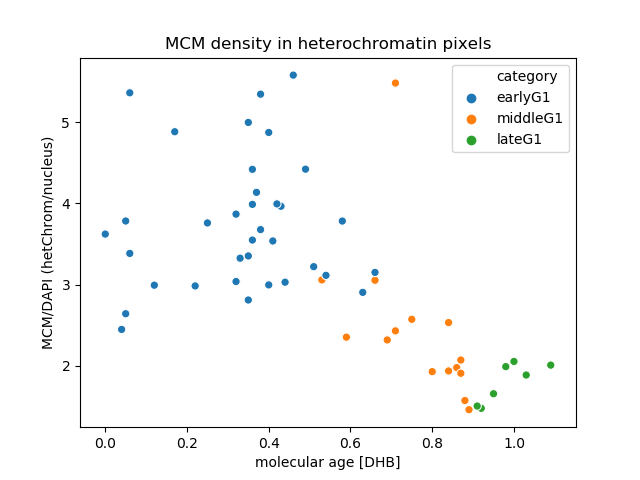

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [59]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


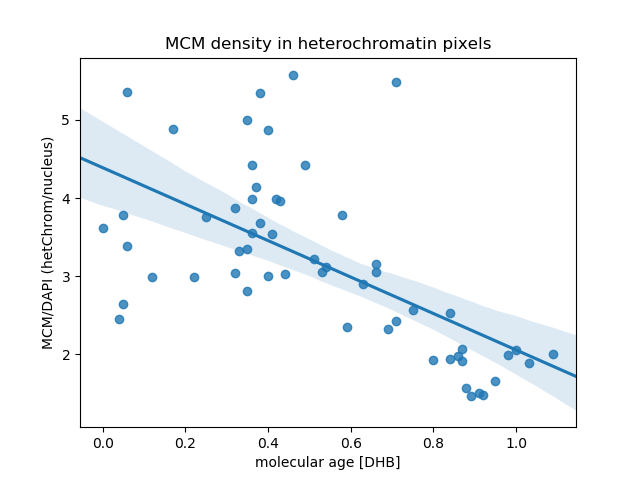

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [60]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [61]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [62]:
myTrendData=myTrendData.append(pd.Series(['amy_mod_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

# plots for not deconvolved

## original, inner

<IPython.core.display.Javascript object>


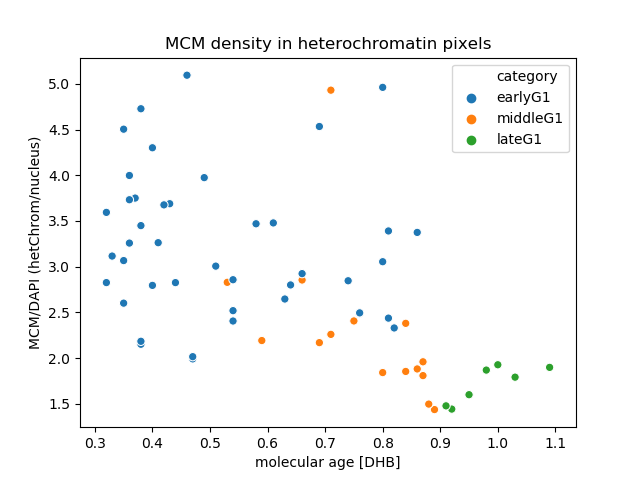

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [76]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


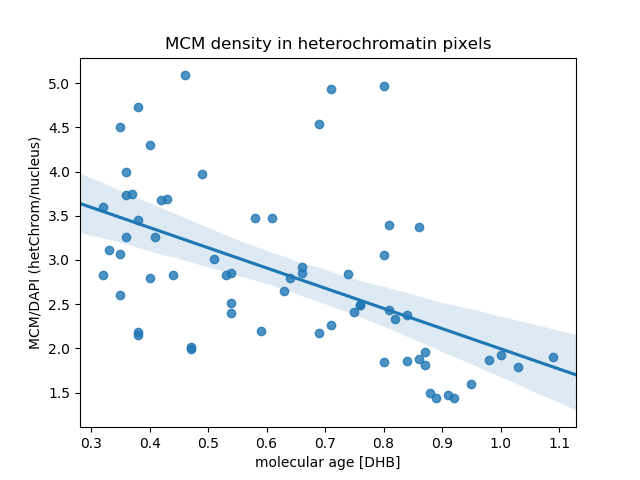

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [77]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [78]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [79]:
myTrendDatand=myTrendDatand.append(pd.Series(['original_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## original, outer

<IPython.core.display.Javascript object>


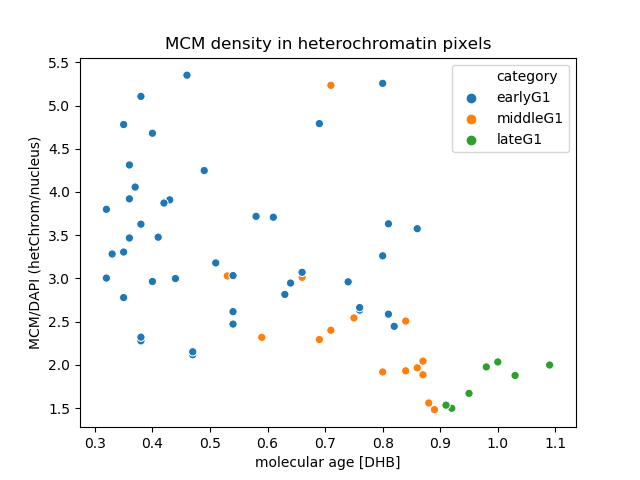

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [80]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


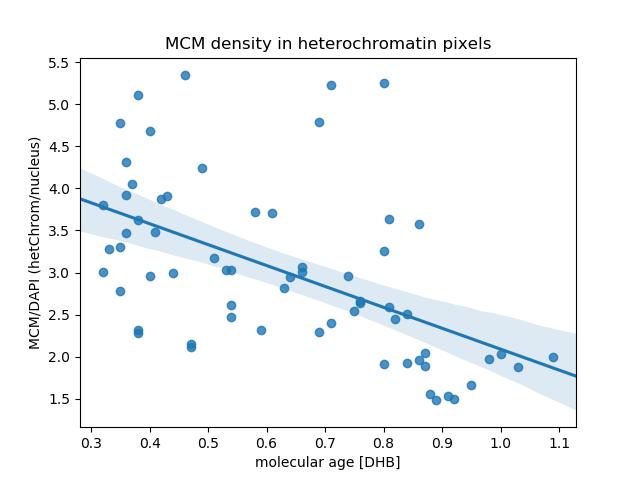

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [81]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [82]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [83]:
myTrendDatand=myTrendDatand.append(pd.Series(['original_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## modification

### modification = 0.3, inner

In [84]:
mod=0.3

In [85]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


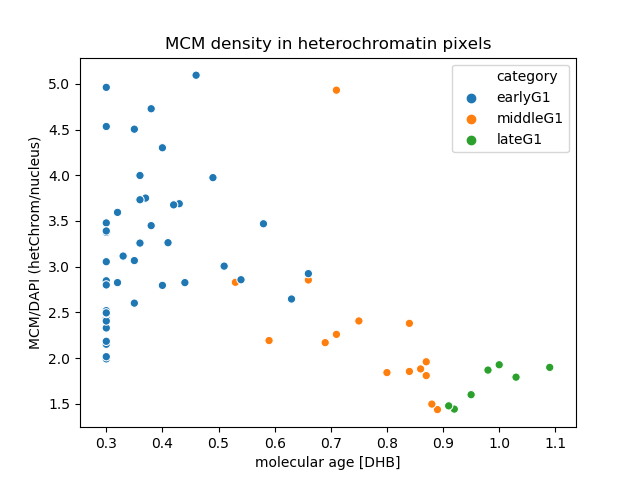

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [86]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


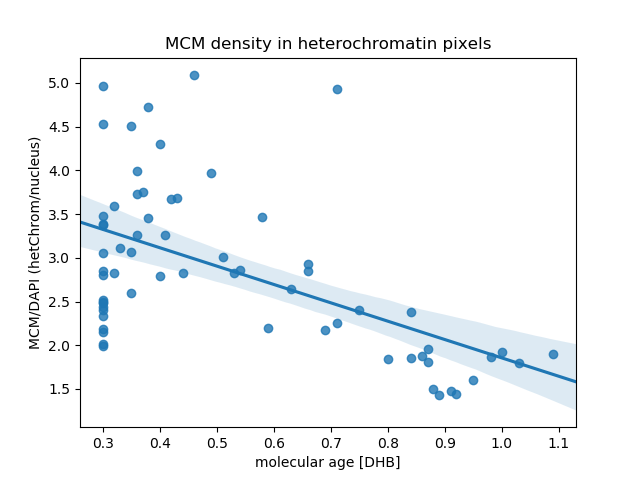

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [87]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [88]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [89]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.3_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.3, outer

In [90]:
mod=0.3

In [91]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


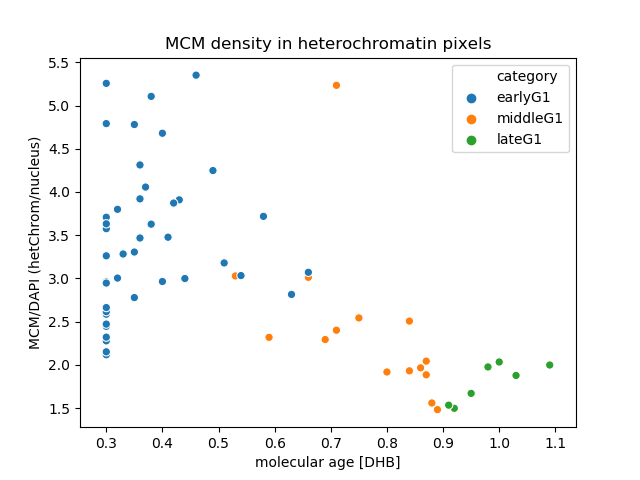

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [92]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


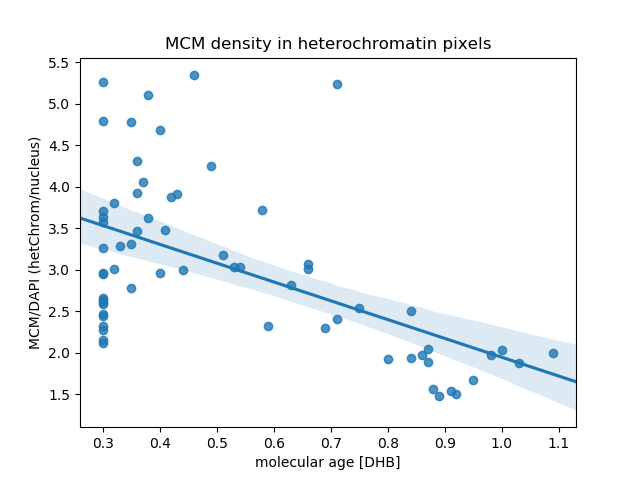

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [93]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [94]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [95]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.3_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0

In [96]:
mod=0

In [97]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


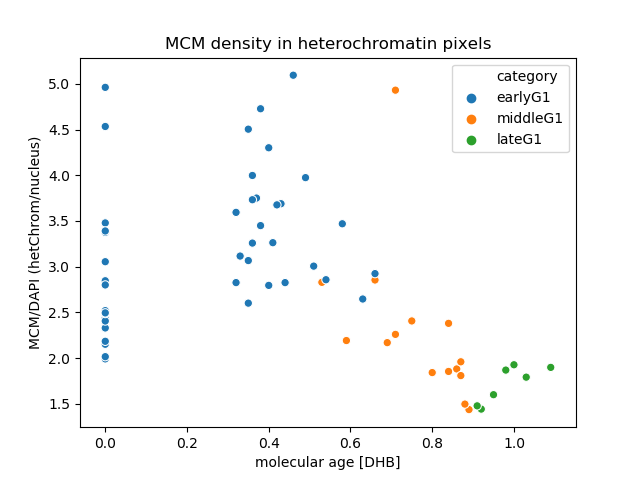

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [98]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


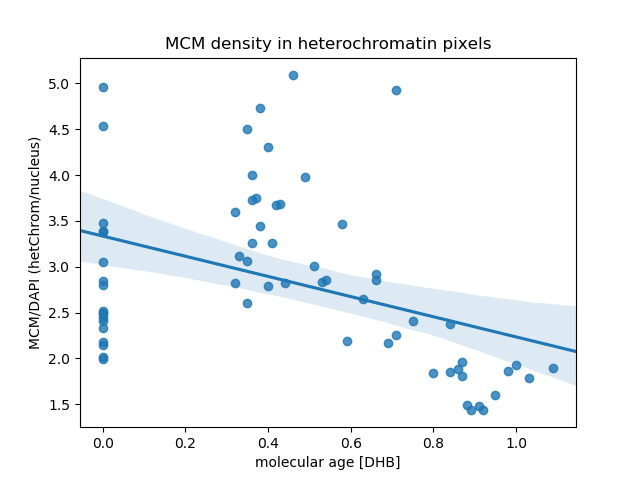

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [99]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [100]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [101]:
myTrendDatand=myTrendDatand.append(pd.Series(['0_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0, outer

<IPython.core.display.Javascript object>


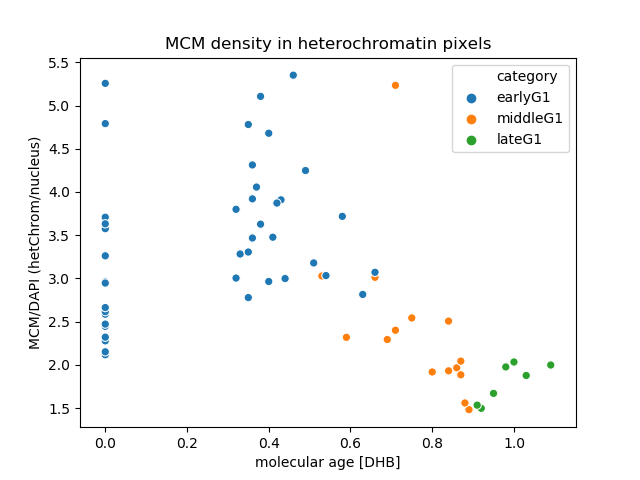

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [102]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


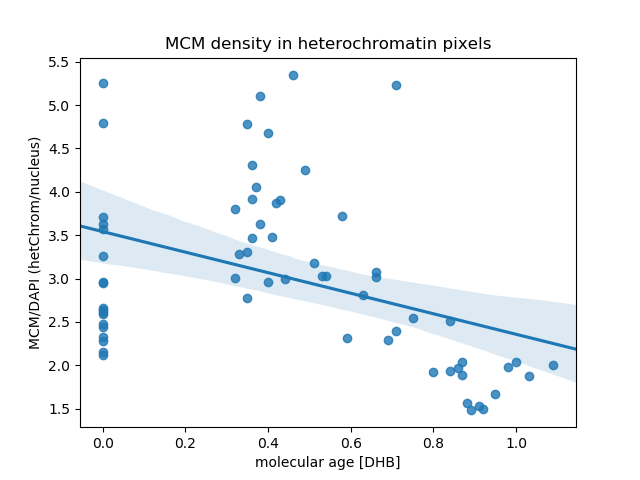

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [103]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [104]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [105]:
myTrendDatand=myTrendDatand.append(pd.Series(['0_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5

In [106]:
mod=0.5

In [107]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


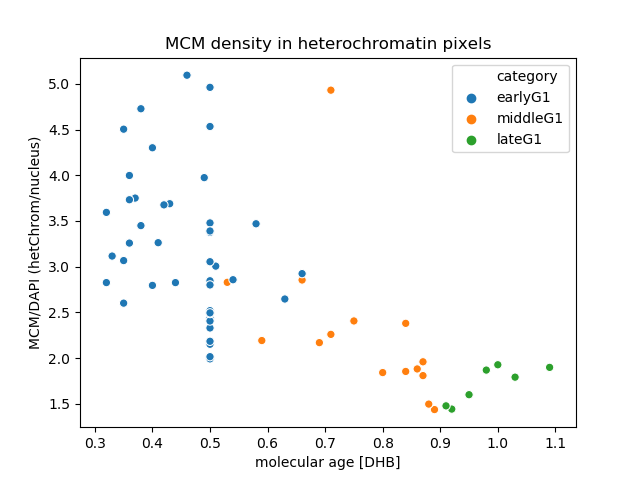

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [108]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


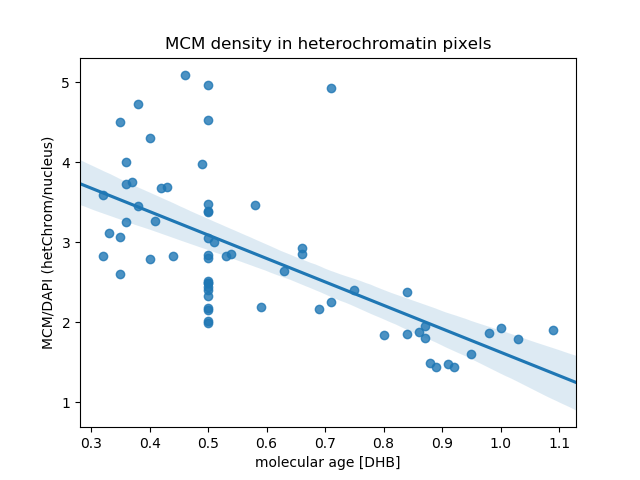

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [109]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [110]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [111]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.5_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5, outer

<IPython.core.display.Javascript object>


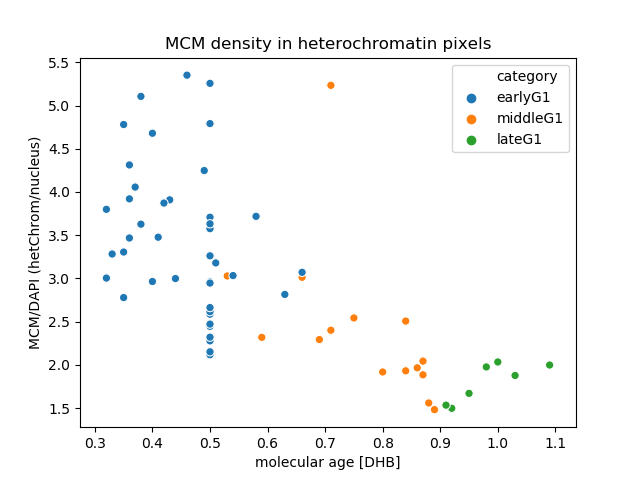

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [112]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


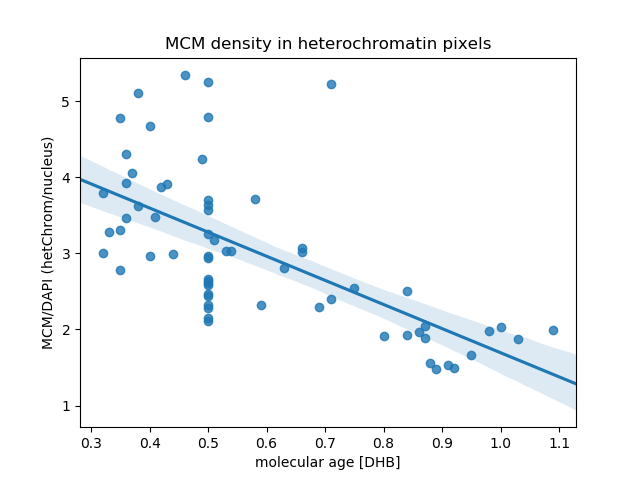

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [113]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [114]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [115]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.5_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy modification

In [116]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd_mol_age_change=myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=-1*myDataSelnd['mol_age_mod']+np.max(myDataSelnd_mol_age_change)

<IPython.core.display.Javascript object>


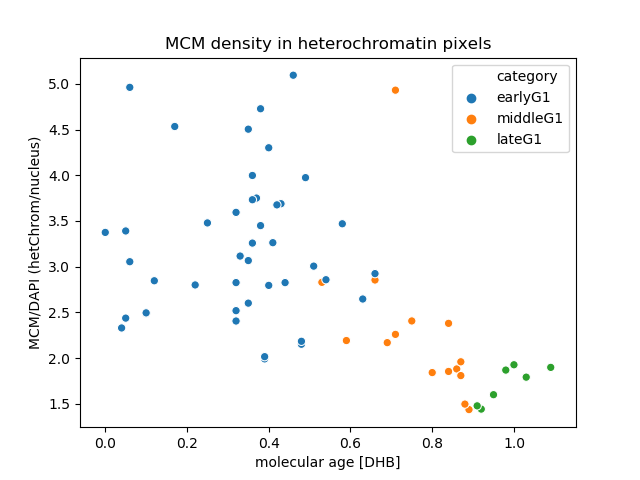

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [117]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


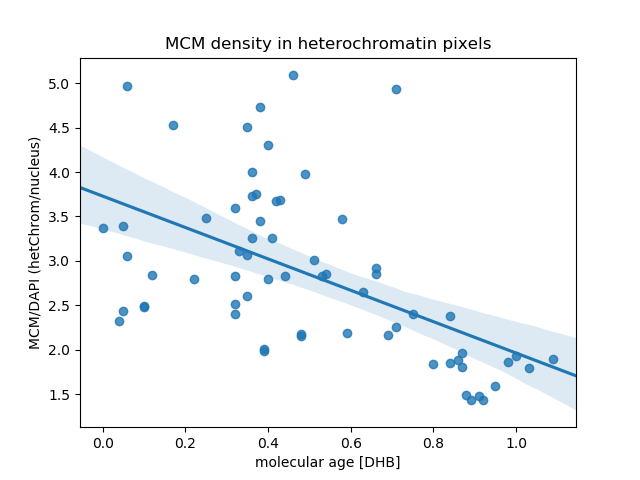

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [118]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_inner_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_inner_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [119]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [120]:
myTrendDatand=myTrendDatand.append(pd.Series(['amy_mod_inner', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0, outer

<IPython.core.display.Javascript object>


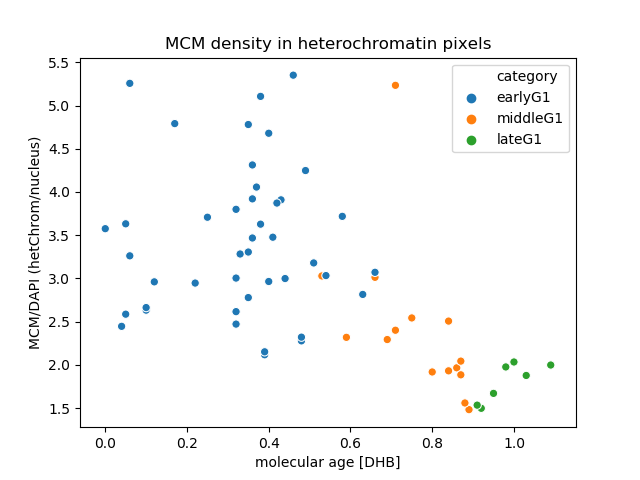

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [121]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


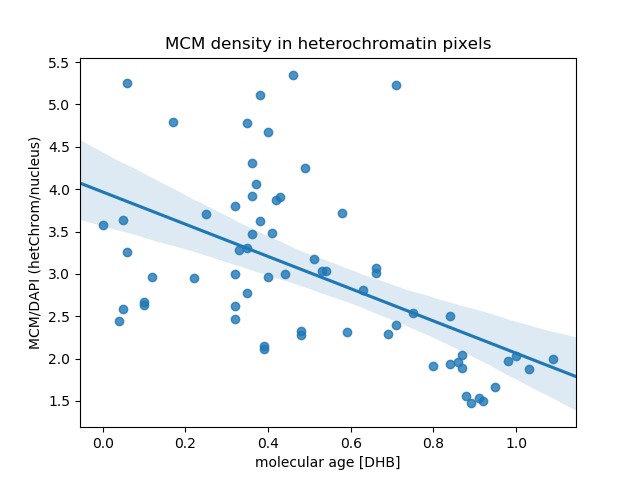

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [122]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_sphere_outer_20_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_sphere_outer_20_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [123]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [124]:
myTrendDatand=myTrendDatand.append(pd.Series(['amy_mod_outer', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

# review

In [125]:
myTrendData['pvalue significance']=True
for i, mod in myTrendData.iterrows():
    if myTrendData.at[i,'pvalue']>0.05:
        myTrendData.at[i,'pvalue significance']=False

In [126]:
myTrendDatand['pvalue significance']=True
for i, mod in myTrendDatand.iterrows():
    if myTrendDatand.at[i,'pvalue']>0.05:
        myTrendDatand.at[i,'pvalue significance']=False

In [127]:
myTrendData=myTrendData.sort_index(by='rsquared',ascending=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [128]:
myTrendData

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
9,amy_mod_outer,-0.704694,3.514657,-0.199393,0.031884,0.324362,0.039757,True
8,amy_mod_inner,-0.688856,3.319409,-0.211988,0.022343,0.297427,0.044939,True
7,0.5_outer,-0.865453,3.659935,-0.214476,0.020781,0.369136,0.046000,True
6,0.5_inner,-0.843731,3.459771,-0.227412,0.014087,0.338382,0.051716,True
1,original_outer,-0.980137,3.766316,-0.240656,0.009262,0.370240,0.057915,True
3,0.3_outer,-0.953139,3.700628,-0.251383,0.006489,0.343711,0.063193,True
0,original_inner,-0.950625,3.559799,-0.253859,0.005964,0.339234,0.064444,True
2,0.3_inner,-0.926177,3.497310,-0.265673,0.003947,0.314775,0.070582,True
5,0_outer,-0.952422,3.665640,-0.286235,0.001840,0.298601,0.081930,True
4,0_inner,-0.922666,3.461437,-0.301587,0.001002,0.273195,0.090954,True


In [129]:
myTrendDatand

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
0,original_inner,-0.861217,3.399201,-0.245686,0.005750,0.306379,0.060362,True
1,original_outer,-0.883169,3.583706,-0.232964,0.008935,0.332419,0.054272,True
2,0.3_inner,-0.779433,3.292802,-0.243443,0.006225,0.280003,0.059264,True
3,0.3_outer,-0.797004,3.473046,-0.230173,0.009814,0.303832,0.052980,True
4,0_inner,-0.682897,3.191580,-0.252777,0.004454,0.235683,0.063896,True
5,0_outer,-0.698870,3.369901,-0.239196,0.007220,0.255797,0.057215,True
6,0.5_inner,-0.783654,3.323236,-0.224558,0.011814,0.306624,0.050426,True
7,0.5_outer,-0.800678,3.503710,-0.212148,0.017541,0.332557,0.045007,True
8,amy_mod_inner,-0.603072,3.165501,-0.200694,0.024822,0.265434,0.040278,True
9,amy_mod_outer,-0.614184,3.341233,-0.188990,0.034789,0.287746,0.035717,True
